In [6]:
import pandas as pd
from matplotlib import pyplot as plt 

In [7]:
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')
df_movies = pd.read_csv('ml-latest-small/movies.csv')
merged = pd.merge(df_ratings, df_movies, on='movieId', how='left')
merged

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [10]:
merged.shape

(100836, 6)

In [19]:
df_movies[df_movies['title'] == '¡Three Amigos! (1986)']

,movieId,title,genres
1866,2478,¡Three Amigos! (1986),Comedy|Western


In [20]:
df_ratings[df_ratings['movieId'] == 2478]

,userId,movieId,rating,timestamp
160,1,2478,4.0,964984169
2753,19,2478,2.0,965706748
4155,27,2478,5.0,965150090
6135,42,2478,5.0,996259254
8381,57,2478,2.0,965798609
10764,68,2478,4.0,1158535907
13508,88,2478,3.5,1331420236
21739,141,2478,3.5,1513132289
28478,198,2478,2.0,1034137364
30675,215,2478,2.5,1260905543


/tmp/ipykernel_15151/2258034757.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


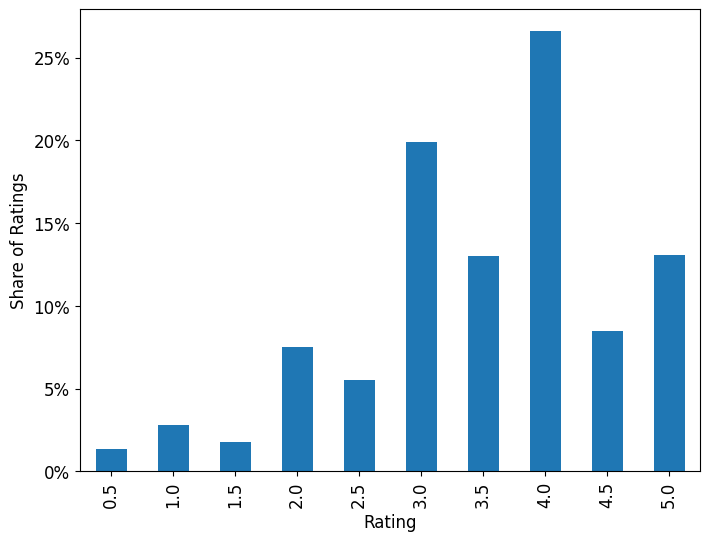

In [11]:
fig = plt.figure()
ax = df_ratings.rating.value_counts(True).sort_index().plot.bar(figsize=(8,6))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Share of Ratings', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.savefig('Ratings_distribution.png')

In [14]:
R = pd.pivot_table(data=merged, index='userId', columns='title', values='rating')
R

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [21]:
# !git clone -b latest https://github.com/muhanzhang/IGMC.git

Cloning into 'IGMC'...
remote: Enumerating objects: 285, done.
remote: Total 285 (delta 0), reused 0 (delta 0), pack-reused 285
Receiving objects: 100% (285/285), 19.64 MiB | 1.06 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [22]:
# import shutil
# import os
# files_to_move = ['util_functions.py', 'data_utils.py', 'preprocessing.py']
# for f in files_to_move:
#   if not os.path.exists(f):
#     shutil.move(os.path.join('IGMC', f), f)

In [25]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch.optim import Adam
from torch_geometric.data import DataLoader
from torch_geometric.nn import RGCNConv
from torch_geometric.utils import dropout_adj
from util_functions import *
from data_utils import *
from preprocessing import *

In [26]:
# Arguments
EPOCHS=2
BATCH_SIZE=50
LR=1e-3
LR_DECAY_STEP = 20
LR_DECAY_VALUE = 10

In [27]:
torch.manual_seed(123)
device = torch.device('cpu')

if torch.cuda.is_available():
    torch.cuda.manual_seed(123)
    torch.cuda.synchronize()
    device = torch.device('cuda')
    
device

device(type='cpu')

In [28]:
(u_features, v_features, adj_train, train_labels, train_u_indices, train_v_indices, val_labels, 
val_u_indices, val_v_indices, test_labels, test_u_indices, test_v_indices, class_values
) = load_official_trainvaltest_split('ml_100k', testing=True)

User features shape: (943, 23)
Item features shape: (1682, 18)


In [29]:
train_dataset = eval('MyDynamicDataset')(root='data/ml_100k/testmode/train', A=adj_train, 
    links=(train_u_indices, train_v_indices), labels=train_labels, h=1, sample_ratio=1.0, 
    max_nodes_per_hop=200, u_features=None, v_features=None, class_values=class_values)
test_dataset = eval('MyDataset')(root='data/ml_100k/testmode/test', A=adj_train, 
    links=(test_u_indices, test_v_indices), labels=test_labels, h=1, sample_ratio=1.0, 
    max_nodes_per_hop=200, u_features=None, v_features=None, class_values=class_values)

len(train_dataset), len(test_dataset)

Enclosing subgraph extraction begins...


Processing...
100%|██████████| 16/16 [00:19<00:00,  1.19s/it]


Time elapsed for subgraph extraction: 19.243484020233154s
Transforming to pytorch_geometric graphs...


100%|██████████| 20000/20000 [00:05<00:00, 3926.85it/s]


Time elapsed for transforming to pytorch_geometric graphs: 5.113254547119141s


Done!


(80000, 20000)

In [30]:
class IGMC(torch.nn.Module):
    def __init__(self):
        super(IGMC, self).__init__()
        self.rel_graph_convs = torch.nn.ModuleList()
        self.rel_graph_convs.append(RGCNConv(in_channels=4, out_channels=32, num_relations=5, num_bases=4))
        self.rel_graph_convs.append(RGCNConv(in_channels=32, out_channels=32, num_relations=5, num_bases=4))
        self.rel_graph_convs.append(RGCNConv(in_channels=32, out_channels=32, num_relations=5, num_bases=4))
        self.rel_graph_convs.append(RGCNConv(in_channels=32, out_channels=32, num_relations=5, num_bases=4))
        self.linear_layer1 = Linear(256, 128)
        self.linear_layer2 = Linear(128, 1)

    def reset_parameters(self):
        self.linear_layer1.reset_parameters()
        self.linear_layer2.reset_parameters()
        for i in self.rel_graph_convs:
            i.reset_parameters()

    def forward(self, data):
        num_nodes = len(data.x)
        edge_index_dr, edge_type_dr = dropout_adj(data.edge_index, data.edge_type, p=0.2, num_nodes=num_nodes, training=self.training)

        out = data.x
        h = []
        for conv in self.rel_graph_convs:
            out = conv(out, edge_index_dr, edge_type_dr)
            out = torch.tanh(out)
            h.append(out)
        h = torch.cat(h, 1)
        h = [h[data.x[:, 0] == True], h[data.x[:, 1] == True]]
        g = torch.cat(h, 1)
        out = self.linear_layer1(g)
        out = F.relu(out)
        out = F.dropout(out, p=0.5, training=self.training)
        out = self.linear_layer2(out)
        out = out[:,0]
        return out

model = IGMC()

In [31]:
train_loader = DataLoader(train_dataset, BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, BATCH_SIZE, shuffle=False, num_workers=2)

/home/abdulrehman/anaconda3/envs/gnn_env/lib/python3.9/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [32]:
model.to(device)
model.reset_parameters()
optimizer = Adam(model.parameters(), lr=LR, weight_decay=0)

In [33]:
for epoch in range(1, EPOCHS+1):
    model.train()
    train_loss_all = 0
    for train_batch in train_loader:
        optimizer.zero_grad()
        train_batch = train_batch.to(device)
        y_pred = model(train_batch)
        y_true = train_batch.y
        train_loss = F.mse_loss(y_pred, y_true)
        train_loss.backward()
        train_loss_all += BATCH_SIZE * float(train_loss)
        optimizer.step()
        torch.cuda.empty_cache()
    train_loss_all = train_loss_all / len(train_loader.dataset)
    
    print('epoch', epoch,'; train loss', train_loss_all)

    if epoch % LR_DECAY_STEP == 0:
      for param_group in optimizer.param_groups:
          param_group['lr'] = param_group['lr'] / LR_DECAY_VALUE

/home/abdulrehman/anaconda3/envs/gnn_env/lib/python3.9/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'dropout_adj' is deprecated, use 'dropout_edge' instead
  warnings.warn(out)


epoch 1 ; train loss 1.2462044100835918
epoch 2 ; train loss 1.0801696642115712


In [35]:
model

IGMC(
  (rel_graph_convs): ModuleList(
    (0): RGCNConv(4, 32, num_relations=5)
    (1): RGCNConv(32, 32, num_relations=5)
    (2): RGCNConv(32, 32, num_relations=5)
    (3): RGCNConv(32, 32, num_relations=5)
  )
  (linear_layer1): Linear(in_features=256, out_features=128, bias=True)
  (linear_layer2): Linear(in_features=128, out_features=1, bias=True)
)

In [34]:
# Save the model
torch.save(model.state_dict(), 'model.pt')

In [36]:
# Load the model
model = IGMC()
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [37]:
model

IGMC(
  (rel_graph_convs): ModuleList(
    (0): RGCNConv(4, 32, num_relations=5)
    (1): RGCNConv(32, 32, num_relations=5)
    (2): RGCNConv(32, 32, num_relations=5)
    (3): RGCNConv(32, 32, num_relations=5)
  )
  (linear_layer1): Linear(in_features=256, out_features=128, bias=True)
  (linear_layer2): Linear(in_features=128, out_features=1, bias=True)
)

In [38]:
import math

model.eval()
test_loss = 0
for test_batch in test_loader:
    test_batch = test_batch.to(device)
    with torch.no_grad():
        y_pred = model(test_batch)
    y_true = test_batch.y
    test_loss += F.mse_loss(y_pred, y_true, reduction='sum')
    # torch.cuda.empty_cache()
mse_loss = float(test_loss) / len(test_loader.dataset)

print('test MSE loss', mse_loss)
print('test RMSE loss', math.sqrt(mse_loss))

/home/abdulrehman/anaconda3/envs/gnn_env/lib/python3.9/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'dropout_adj' is deprecated, use 'dropout_edge' instead
  warnings.warn(out)


test MSE loss 0.9113521484375
test RMSE loss 0.9546476566972235
